In [1]:
import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Synthetic data generation

In [3]:
import warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed")

In [4]:
import pandas as pd

## Load transactions

In [18]:
data = pd.read_csv('data/james.csv')
data.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


## Prepare dataset

In [19]:
data = data.dropna()

In [20]:
data['SeriousDlqin2yrs'] = data['SeriousDlqin2yrs'].astype(dtype='category')

In [21]:
data = data.drop('Unnamed: 0', axis=1)

In [22]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

## Train model and synthesized data

In [25]:
from synthesized.core import BasicSynthesizer

In [26]:
with BasicSynthesizer(data=data, embedding_size=32, iterations=20000) as synthesizer:
    synthesizer.learn(data=data, verbose=1000)
    synthesized = synthesizer.synthesize(n=100000)

value types:
SeriousDlqin2yrs categorical
RevolvingUtilizationOfUnsecuredLines continuous
age categorical-similarity
NumberOfTime30-59DaysPastDueNotWorse categorical-similarity
DebtRatio continuous
MonthlyIncome continuous
NumberOfOpenCreditLinesAndLoans categorical-similarity
NumberOfTimes90DaysLate categorical-similarity
NumberRealEstateLoansOrLines categorical-similarity
NumberOfTime60-89DaysPastDueNotWorse categorical-similarity
NumberOfDependents categorical-similarity
5000: 5.68e+01
10000: 5.08e+01
15000: 4.44e+01
20000: 3.67e+01


## Display synthesized data

In [27]:
synthesized.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.038772,23,0,0.003237,94.554207,3,0,0,0,0.0
1,0,0.273724,28,0,0.555052,90.718552,11,0,0,0,0.0
2,0,0.392771,39,0,4.949429,91.642761,8,0,1,0,0.0
3,0,0.037791,51,0,7.624758,89.383469,6,0,2,0,0.0
4,0,0.001405,57,0,0.124712,95.055748,6,0,0,0,0.0


In [28]:
data.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Visualization of original and synthetic data

In [29]:
from synthesized.testing import UtilityTesting, ColumnType
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [30]:
testing = UtilityTesting(synthesizer, train, test, synthesized)

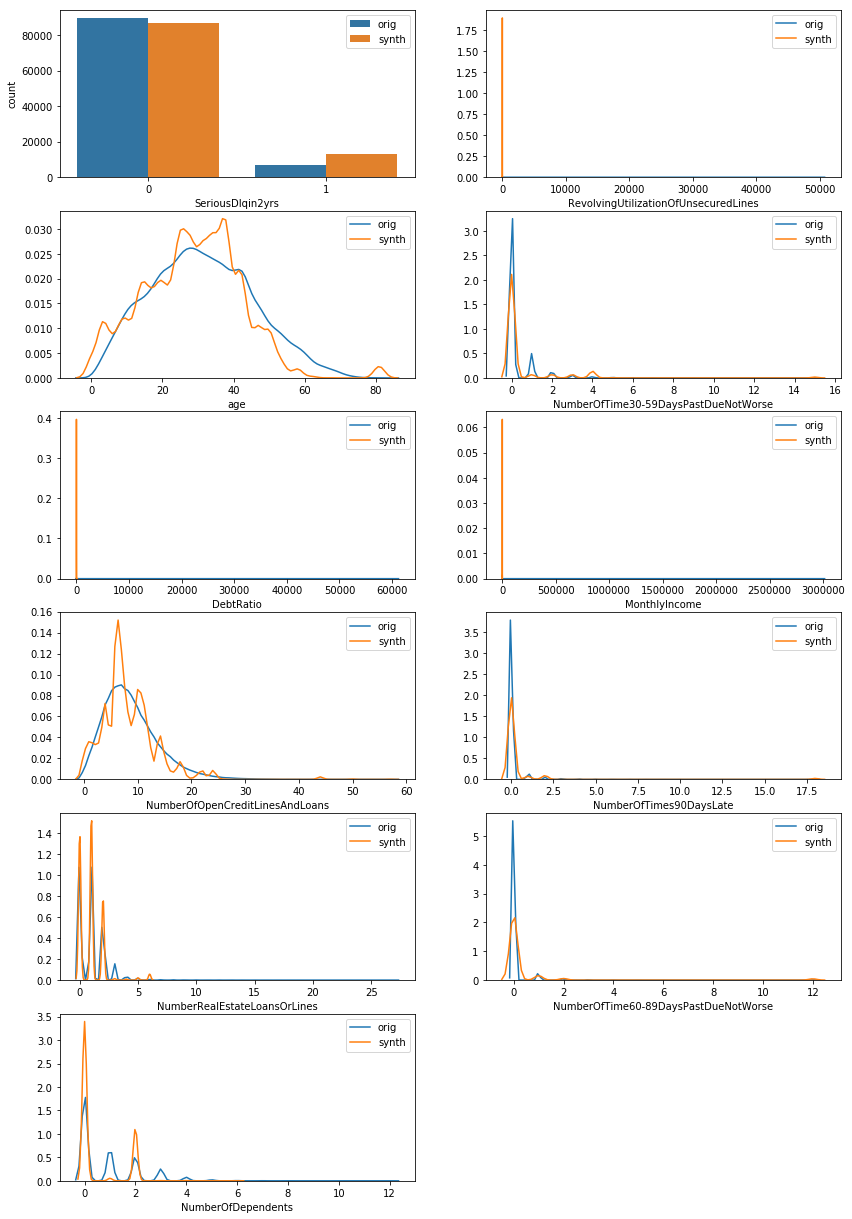

In [31]:
testing.show_distributions()

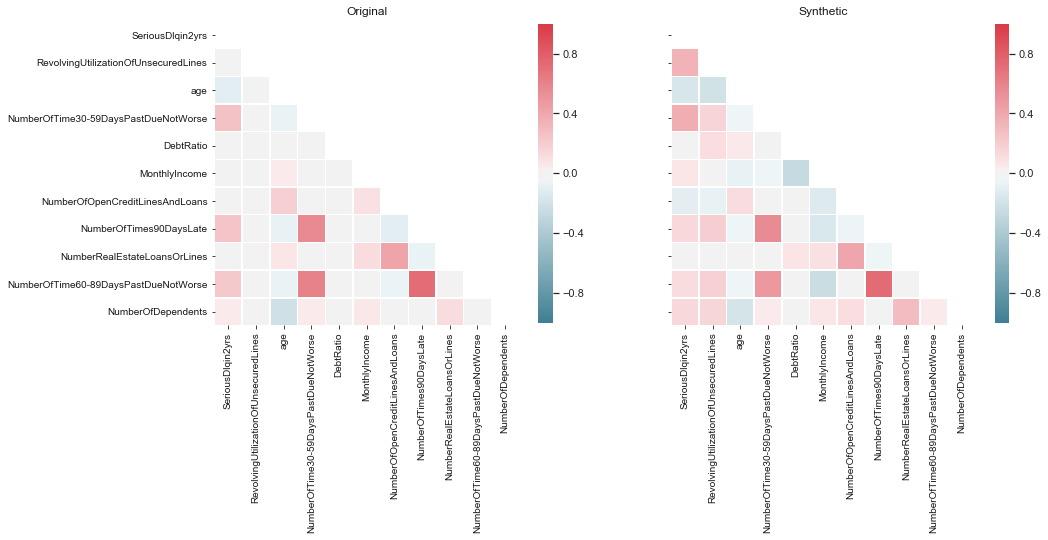

In [32]:
testing.show_corr_matrices()

# Tests to confirm the utility of synthetic data

In [33]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

,target_column,estimator,dummy_original_score,original_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,DebtRatio,DecisionTreeRegressor,0.000000,0.000000,0.011726,489.502116,287.251982,0.0,1.704086
1,DebtRatio (categorical reduction),DecisionTreeClassifier,0.999626,0.999335,0.999626,0.000540,0.000374,NaN,1.444444
2,MonthlyIncome,DecisionTreeRegressor,0.000000,0.000000,0.000000,9762.753339,15378.389355,NaN,0.634836
3,MonthlyIncome (categorical reduction),DecisionTreeClassifier,0.999917,0.999834,0.999917,0.000125,0.000083,NaN,1.500000
4,NumberOfDependents,DecisionTreeRegressor,0.000000,0.000000,0.000000,1.481002,1.330108,NaN,1.113445
5,NumberOfDependents (categorical reduction),DecisionTreeClassifier,0.751143,0.627630,0.690987,0.373618,0.306976,NaN,1.217091
6,NumberOfOpenCreditLinesAndLoans,DecisionTreeRegressor,0.000000,0.000000,0.000000,5.929157,6.529344,NaN,0.908079
7,NumberOfOpenCreditLinesAndLoans (categorical r...,DecisionTreeClassifier,0.467157,0.452357,0.464995,0.548059,0.533757,NaN,1.026793
8,NumberOfTime30-59DaysPastDueNotWorse,DecisionTreeRegressor,0.000000,0.000000,0.000000,0.933454,1.367039,NaN,0.682829
9,NumberOfTime30-59DaysPastDueNotWorse (categori...,DecisionTreeClassifier,0.944001,0.898562,0.836327,0.101854,0.152573,NaN,0.667575


In [25]:
testing.compare_marginal_distributions(target_column='NumberRealEstateLoansOrLines', conditional_column='NumberOfDependents')

,NumberOfDependents,NumberRealEstateLoansOrLines EMD
0,"[0.0, 2.75)",0.368128
1,"[2.75, 5.5)",0.951742
2,"[5.5, 8.25)",inf
3,"[8.25, 11.0)",inf


# Tests to confirm the security of original data 

In [75]:
from synthesized.testing import LinkageAttackTesting, Column

## Focus on a small chunk of original data for demo purposes

In [76]:
data_orig_reduced = data.head(30000)

## Define schema for security checks

Each attribute in a dataset has the following properties to be specified by the user
1. "key_attribute" - whether the attribute can be available to the attacker as background knowledge 
2. "sensitive" - whether the attribute is SPI 
3. "categorical" - wtether the attribute is a categorical variable

In [77]:
data_orig_reduced.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
35298,35299,0,0.133608,56,0,0.151236,54166.0,20,0,3,0,3.0
110943,110944,0,0.268997,27,0,0.051128,3500.0,4,0,0,0,0.0
44650,44651,1,0.950586,41,2,0.321115,11266.0,6,1,1,0,0.0
97475,97476,0,0.362873,56,0,0.426120,8100.0,8,0,2,0,1.0
27331,27332,0,1.015698,39,1,0.241451,3362.0,3,0,0,0,2.0


In [78]:
data.dtypes

Unnamed: 0                                int32
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float32
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float32
MonthlyIncome                           float32
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [79]:
schema = {
    'age': Column(key_attribute=True, sensitive=True, categorical=False),
    'MonthlyIncome': Column(key_attribute=True, sensitive=True, categorical=False),
    'NumberOfDependents': Column(key_attribute=True, sensitive=True, categorical=False),
    'DebtRatio': Column(key_attribute=False, sensitive=True, categorical=False),
}

## Identify and demonstrate vulnerabilities in synthetic data

In [80]:
linkage = LinkageAttackTesting(data_orig_reduced, synthesized, schema)

In [81]:
attacks = linkage.identify_attacks()

In [40]:
len(attacks)

780

In [41]:
linkage.show_attacked_data(attacks[3])

attribute under attack:  NumberOfDependents

bacground knowledge:  MonthlyIncome


 original df subset: 
         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
144793      144794                 0                              0.980102   
18200        18201                 0                              1.000000   
140668      140669                 0                              1.000000   

        age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
144793   57                                     0   0.504316         1621.0   
18200    25                                     0   0.000000         1625.0   
140668   59                                     0   0.009254         1620.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
144793                                4                        0   
18200                                 0                        1   
140668                                3                     

## Clear the synthetic dataset from vulnerabilities

In [46]:
cleared_df = linkage.eradicate_attacks(attacks)

remaining attacks :  780
remaining attacks :  695


## Demonstrate the security of synthetic data

In [47]:
from synthesized.testing.linkage_attack import identify_attacks

In [48]:
new_attacks = identify_attacks(data_orig_reduced, cleared_df, schema)

In [49]:
len(new_attacks)

0

## Demonstrate the utility of synthetic data cleared from all vulnerabilities

In [50]:
testing = UtilityTesting(synthesizer, data, test, cleared_df)

In [51]:
testing.estimate_utility(classifier=DecisionTreeClassifier(), regressor=DecisionTreeRegressor())

,target_column,estimator,dummy_original_score,original_score,synth_score,orig_error,synth_error,score_utility,error_utility
0,DebtRatio,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000042,454.963983,0.0,9.254882e-08
1,DebtRatio (categorical reduction),DecisionTreeClassifier,9.996051e-01,1.000000,0.371907,0.000000,0.621857,0.0,0.000000e+00
2,MonthlyIncome,DecisionTreeRegressor,2.611594e-08,1.000000,0.000000,0.000000,30681.376622,0.0,0.000000e+00
3,MonthlyIncome (categorical reduction),DecisionTreeClassifier,9.998441e-01,1.000000,0.999844,0.000000,0.000156,0.0,0.000000e+00
4,NumberOfDependents,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,1.457998,0.0,0.000000e+00
5,NumberOfDependents (categorical reduction),DecisionTreeClassifier,7.459024e-01,1.000000,0.656904,0.000000,0.414842,0.0,0.000000e+00
6,NumberOfOpenCreditLinesAndLoans,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,7.410916,0.0,0.000000e+00
7,NumberOfOpenCreditLinesAndLoans (categorical r...,DecisionTreeClassifier,4.692615e-01,1.000000,0.323318,0.000000,0.674791,0.0,0.000000e+00
8,NumberOfTime30-59DaysPastDueNotWorse,DecisionTreeRegressor,0.000000e+00,1.000000,0.000000,0.000000,3.871774,0.0,0.000000e+00
9,NumberOfTime30-59DaysPastDueNotWorse (categori...,DecisionTreeClassifier,9.437302e-01,1.000000,0.784368,0.000000,0.209822,0.0,0.000000e+00


## Demonstrate the synthetic dataset to be released to the user

In [52]:
synthesized

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,78,0,0.153416,40,0,20.408154,5102.949219,7,0,0,0,0.0
1,63,0,-0.014226,47,0,-2.766595,6288.951172,12,0,2,0,0.0
2,142,0,-0.128654,50,0,0.375609,18280.949219,26,0,4,0,0.0
3,168,0,-0.056010,50,0,-7.245952,25421.164062,1,0,1,0,1.0
4,68,0,-0.529842,50,0,-7.283205,6722.098145,3,0,1,0,0.0
5,76,0,-0.439260,47,0,5.093261,16231.623047,13,0,4,0,1.0
6,84,0,-0.103682,47,0,5.078568,8304.873047,14,0,1,0,0.0
7,63,0,-0.550586,50,0,17.288071,10125.002930,13,0,2,0,3.0
8,74,0,-0.083273,51,0,3.634742,3920.027100,3,0,0,0,0.0
9,51,0,-0.008189,47,3,2.497983,7025.255859,26,0,2,0,3.0
